<ipython-input-8-49cc4ee0a5bf>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread('/content/Mengkudu (102).jpg',mode='F')


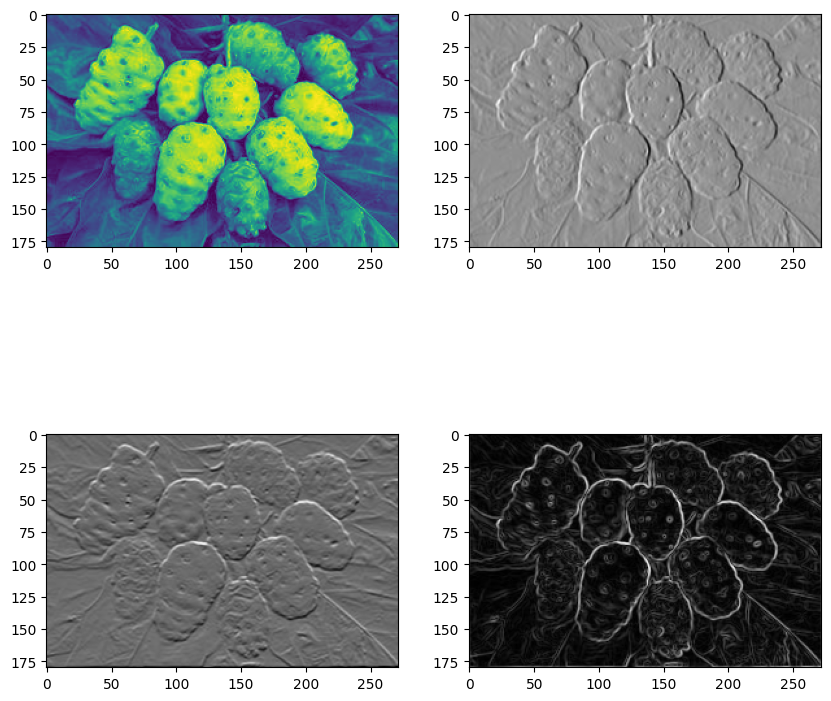

In [8]:
import imageio as img
import numpy as np
import matplotlib.pyplot as plt

image = img.imread('/content/Mengkudu (102).jpg',mode='F')

sobelX = np.array([
     [-1,0,1],
     [-2,0,2],
     [-1,0,1]
 ])

sobelY = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

imgPad = np.pad(image,pad_width=1,mode='constant',constant_values=0)

Gx = np.zeros_like(image)
Gy = np.zeros_like(image)

for y in range(1,imgPad.shape[0]-1):

  for x in range(1,imgPad.shape[1]-1):
    area = imgPad[y-1:y+2,x-1:x+2]
    Gx[y-1,x-1] = np.sum(area*sobelX)
    Gy[y-1,x-1] = np.sum(area*sobelY)

G = np.sqrt(Gx**2 + Gy**2)
G = (G/G.max())*255

G= np.clip(G,0,255)

G = G.astype(np.uint8)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image)

plt.subplot(2,2,2)
plt.imshow(Gx,cmap='gray')

plt.subplot(2,2,3)
plt.imshow(Gy,cmap='gray')

plt.subplot(2,2,4)
plt.imshow(G,cmap='gray')

plt.show()